# 데이터 핸들링 - Pandas

* 판다스는 파이썬에서 데이터 처리를 위해 존재하는 가장 인기 있는 라이브러리입니다.
* 일반적으로 대부분의 데이터 세트는 2차원 데이터 입니다. 즉, 행 $\times$ 열로 구성돼 있습니다.      
* 넘파이보다 훨씬 유연하고 편리하게 데이터 핸들링을 가능하게 해줍니다.   
* RDBMS의 SQL이나 엑셀 시트의 편의성만큼은 아니더라도 판다스는 이에 버금가는 고수준 API를 제공합니다.   
* 판다스는 파이썬의 리스트, 컬렉션, 넘파이 등의 내부 데이터 뿐만 아니라 CSV 등의 파일을 쉽게 DataFrame으로 변경해 데이터의 가공/분석을 편리하게 수행할 수 있게 만들어줍니다.   
* 판다스의 핵심 객체는 DataFrame입니다. DataFrame은 여러개의 행과 열로 이뤄진 2차원 데이터를 담는 데이터 구조체입니다. 판다스가 다루는 대부분의 영역은 바로 DataFrame에 관련된 부분입니다.   
* DataFrame을 이해하기 전에 다른 중요 객체인 Index와 Series와 DataFrame의 가장 큰 차이는 Series는 칼럼이 하나뿐인 데이터 구조체이고, DataFrame은 칼럼이 여러 개인 데이터 구조체라는 점입니다.

## 판다스 시작 - 파일을 DataFrame으로 로딩

In [1]:
import pandas as pd

In [2]:
titanic_df = pd.read_csv('train.csv')
print('titanic 변수 type:',type(titanic_df))
titanic_df

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


``` read_csv() ```는 별다른 파라미터 지정이 없으면, 파일의 맨 처음 로우를 칼럼 명으로 인지하고 칼럼을 변환합니다. 그리고 콤마로 분리된 데이터 값들이 해당 칼럼에 맞게 할당되었습니다.

```DataFrame.head() ```는 DataFrame의 맨 앞에 N개의 로우를 반환합니다.

In [5]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
print('DataFrame 크기:',titanic_df.shape)

DataFrame 크기:  (891, 12)


DataFrame은 데이터뿐만 아니라 칼럼의 타입, Null 데이터 개수, 데이터 분포도 등의 메타 데이터 등도 조회가 가능합니다.

* ```info() ```메서드를 통해 데이터 건수와 데이터 타입, Null 건수를 알 수 있습니다.
* ``` describe() ```메서드는 칼럼별 숫자형 데이터 값이 n-percentile 분포도, 평균값, 최댓값, 최솟값을 나타냅니다. ``` describe() ```메서드는 오직 숫자형(int, float 등) 칼럼의 분포도만 조사하며 자동으로 object 타입의 칼럼은 출력에서 제외시킵니다.

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* count : Not Null인 데이터 건수
* mean : 전체 데이터의 평균값
* std : 표준편차
* min : 최솟값
* max : 최댓값

DataFrame의 [] 연산자 내부에 칼럼명을 입력하면 Series형태로 특정 칼럼 데이터 세트가 반환됩니다. 이렇게 반환된 Series 객체에 ```value_counts() ```메서드를 호출하면 해당 칼럼값의 유형과 건수를 확인할 수 있습니다. ``` value_counts() ```는 데이터의 분포도를 확인하는 데 매우 유용한 함수입니다.

In [3]:
Pclass_value_counts = titanic_df['Pclass'].value_counts()
print(Pclass_value_counts)

3    491
1    216
2    184
Name: Pclass, dtype: int64


```value_counts() ```의 반환 결과는 3이 491개 1이 216개 2가 184개입니다.   
value_counts()는 많은 건수 순서로 정렬되어 값을 반환합니다.   
DataFrame의 [] 연산자 내부에 칼럼명을 입려가면 해당 칼럼에 해당하는 Series 객체를 반환합니다.

In [4]:
titanic_pclass = titanic_df['Pclass']
print(type(titanic_pclass))

<class 'pandas.core.series.Series'>


In [5]:
titanic_pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

Series는 Index와 단 하나의 칼럼으로 구성된 데이터 세트이다.   
Series와 DataFrame은 Index를 반드시 가집니다.   
```value_counts() ``` 메서드는 Series에서만 정의돼 있습니다.   

In [7]:
Pclass_value_counts = titanic_df['Pclass'].value_counts()
print(type(Pclass_value_counts))
print(Pclass_value_counts)

<class 'pandas.core.series.Series'>
3    491
1    216
2    184
Name: Pclass, dtype: int64


위를 보면 인덱스가 0부터 시작하지 않는 것을 볼 수 있습니다.   
인덱스는 단순히 순차 값과 같은 의미 없는 식별자만 할당하는 것이 아니라 고유성만 보장된다면 의미 있는 데이터값 할당도 가능합니다.   
DataFrame, Series가 만들어진 후에도 변경할 수 있습니다.   
단 모든 인덱스는 고유성이 보장돼야 합니다.

## DataFrame과 리스트, 딕셔너리, ndarray 상호 변환

기본적으로 DataFrame은 파이썬의 리스트, 딕셔너리 그리고 numpy ndarray 등 다양한 데이터로 부터 생성 될 수 있고 그 반대도 변환될 수 있습니다.

### numpy ndarray, 리스트, 딕셔너리를 DataFrame으로 변환

DataFrame으로 변환 시 이 칼러명을 지정해 줍니다. (지정하지 않을 경우 자동으로 칼럼명을 할당합니다.) 판다스 DataFrame 객체의 생성 인자 data는 리스트나 딕셔너리, ndarray를 입력받고, 생성 인자 columns는 칼럼명 리스트를 입력 받아서 쉽게 DataFrame을 생성할 수 있습니다.

In [9]:
import numpy as np

col_name1 = ['col1']
list1 = [1,2,3]
array1 = np.array(list1)
print('array1 shape:',array1.shape)

#리스트를 이용하여 DataFrame 생성
df_list1 = pd.DataFrame(list1,columns=col_name1)
print('1차원 리스트로 만든 DataFrame:\n',df_list1)

#넘파이 ndarray를 이용해 DataFrame 생성
df_array1 = pd.DataFrame(array1,columns=col_name1)
print('1차원 ndarray로 만든 DataFrame:\n',df_array1)

array1 shape: (3,)
1차원 리스트로 만든 DataFrame:
    col1
0     1
1     2
2     3
1차원 ndarray로 만든 DataFrame:
    col1
0     1
1     2
2     3


1차원 형태의 데이터 기반으로 DataFrame을 생성하므로 칼럼명이 한 개만 필요하지만,

2차원 형태의 데이터를 기반으로 DataFrame을 생성할 경우 2행 3열이라고 가정할 때 칼럼명은 3개가 필요합니다.

In [10]:
## 3개의 칼럼명이 필요함
col_name2 = ['col1','col2','col3']

# 2행 3열의 리스트와 ndarray 생성 후 DataFrame으로 변환
list2 = [[1,2,3],[11,22,33]]
array2 = np.array(list2)
df_list2 = pd.DataFrame(list2,columns=col_name2)
print('2차원 리스트로 만든 DataFrame:\n',df_list2)
df_array2 = pd.DataFrame(array2,columns=col_name2)
print('2차원 ndarray로 만든 DataFrame:\n',df_array2)

2차원 리스트로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33
2차원 ndarray로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


In [11]:
# 딕셔너리를 DataFrame으로 변환
# 딕셔너리의 key는 칼러명으로, 딕셔너리 값은 칼럼 데이터로 변환됩니다.

dict = {'col1':[1,11], 'col2':[2,22], 'col3':[3,33]}
df_dict = pd.DataFrame(dict)
print('딕셔너리로 만든 DataFrame:\n',df_dict)

딕셔너리로 만든 DataFrame:
    col1  col2  col3
0     1     2     3
1    11    22    33


### DaraFrame을 ndarray, 리스트, 딕셔너리로 변환하기
1. DataFrame to ndarray: ``` DataFrame.values```를 이용하면 DataFrame을 ndarray로 변환할 수 있습니다.
2. DataFrame to list : ``` DataFrame.values.tolist()```를 호출하면 됩니다.
3. DataFrame to dict : ``` DataFrame.to_dict()``` 메서드를 호출하는 데, 인자로 'list'를 입력하면 딕셔너리의 값이 list형으로 반환됩니다.

In [13]:
# DataFrame을 ndarray로 변환
array3 = df_dict.values
print('df_dict.values 타입',type(array3), 'df_dict.values shape:',array3.shape)
print(array3)

#DataFrame을 list로 변환
list3 = df_dict.values.tolist()
print('\ndf_dict.values.tolist() 타입',type(list3))
print(list3)

#DataFrame을 dict로 변환
dict3 = df_dict.to_dict('list')
print('\ndf_dict.values.to_dict() 타입:',type(dict3))
print(dict3)

df_dict.values 타입 <class 'numpy.ndarray'> df_dict.values shape: (2, 3)
[[ 1  2  3]
 [11 22 33]]

df_dict.values.tolist() 타입 <class 'list'>
[[1, 2, 3], [11, 22, 33]]

df_dict.values.to_dict() 타입: <class 'dict'>
{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}


## DataFrame의 카럼 데이터 세트 생성과 수정
DataFrame의 칼럼 데이터 세트 생성과 수정 역시 [] 연산자를 이용해 쉽게 할 수 있습니다.

In [3]:
titanic_df['Age_0'] = 0
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


새로운 칼럼명 'Age_0'으로 모든 데이터 값이 0으로 할당된 Series가 기존 DataFrame에 추가됩니다.   
이렇듯 칼럼 Series에 값을 할당하고 DataFrame에 추가 하는 것은 판다스에서 매우 간단합니다.

In [5]:
titanic_df['Age_by_10'] = titanic_df['Age'] * 10
titanic_df['Family_No'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,220.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,380.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,260.0,1


DataFrame내의 기존 칼럼 값도 쉽게 일괄적으로 업데이트할 수 있습니다.   
업데이트를 원하는 칼럼 Series를 DataFrame[] 내에 칼럼 명으로 입력한 뒤에 값을 할당해주면 됩니다.

In [10]:
titanic_df['Age_by_10'] = titanic_df['Age_by_10'] + 100
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


## DataFrame 데이터 삭제
DataFrame에서 데이터 삭제는 ```drop() ```메서드를 이용합니다.    
```drop() ```메서드를 사용하는 데 혼동을 줄 만한 부분이 있어서 주의가 필요합니다.   
```DataFrame.drop(labels=None, axis=0, index=None, columns=None, levels=None, inplace=False, errors='raise')```   
이 중 가장 중요한 파라미터는 labels, axis, inplace 입니다.   
* axis : 특정 칼럼 또는 특정 행을 드롭합니다. axis0 은 로우 방향 축, axis 1은 칼럼 방향 축입니다.
* labels : 원하는 칼럼 명을 입력합니다.
* inplace : ```inplace = False```면 자기 자신의 DataFrame의 데이터는 삭제하지 않으며, 삭제된 DataFrame을 반환하고 ```inplace = True```로 설정하면 자신의 DataFrame의 데이터를 삭제합니다.

In [11]:
titanic_drop_df = titanic_df.drop('Age_0',axis=1)
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,360.0,1


In [12]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Age_by_10,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,320.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,480.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,360.0,1


In [14]:
drop_result = titanic_df.drop(['Age_0','Age_by_10','Family_No'],axis=1,inplace=True)
print('inplace=True로 drop후 반환된 값:',drop_result)
titanic_df.head(3)

inplace=True로 drop후 반환된 값: None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
# 이번에는 axis=0으로 설정해 index 0,1,2 (맨 앞 3개 데이터) 로우를 삭제
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',15)
print('#### before axis 0 drop ####')
print(titanic_df.head(3))
titanic_df.drop([0,1,2],axis=0,inplace=True)

print('#### after axis 0 drop ####')
print(titanic_df.head(3))

#### before axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch          Ticket     Fare Cabin Embarked
0            1         0       3  Braund, Mr....    male  22.0      1      0       A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mr...  female  38.0      1      0        PC 17599  71.2833   C85        C
2            3         1       3  Heikkinen, ...  female  26.0      0      0  STON/O2. 31...   7.9250   NaN        S
#### after axis 0 drop ####
   PassengerId  Survived  Pclass            Name     Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked
3            4         1       1  Futrelle, M...  female  35.0      1      0  113803  53.1000  C123        S
4            5         0       3  Allen, Mr. ...    male  35.0      0      0  373450   8.0500   NaN        S
5            6         0       3  Moran, Mr. ...    male   NaN      0      0  330877   8.4583   NaN        Q


다음과 같이 drop() 메서드에서 axis와 inplace 인자를 적용해 DataFrame을 변경하는 방식을 정리할 수 있습니다.

## Index 객체

Index 객체는 DataFrame, Series의 레코드를 고유하게 식별하는 객체입니다.   
DataFrame, Series에서 Index 객체만 추출하려면 DatFrame.index 또는 Series.index 속성을 통해 가능합니다.

In [4]:
# 원본 파일 다시 로딩
titanic_df = pd.read_csv('train.csv')

# Index 객체 추출
indexes = titanic_df.index
print(indexes)

# Index 객체를 실제값 array로 반환
print('Index 객체 array값:\n',indexes.values)

RangeIndex(start=0, stop=891, step=1)
Index 객체 array값:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232

Index객체는 식별성 데이터를 1차원 array로 가지고 있고, ndarray와 유사하게 단일 값 반환 및 슬라이싱이 가능합니다.

In [5]:
print(type(indexes.values))
print(indexes.values.shape)
print(indexes[:5].values)
print(indexes.values[:5])
print(indexes[6])

<class 'numpy.ndarray'>
(891,)
[0 1 2 3 4]
[0 1 2 3 4]
6


한 번 만들어진 DataFrame 및 Series의 Index 객체는 함부로 변경할 수 없습니다.

In [6]:
indexes[0] = 5

TypeError: Index does not support mutable operations

DataFrame 및 Series에 ```reset_index()``` 메서드를 수행하면 새롭게 인덱스를 연속 숫자 형으로 할당하면, 기존 인덱스는 index라는 새로운 칼럼명으로 추가됩니다.

In [7]:
titanic_reset_df = titanic_df.reset_index(inplace=False)
titanic_reset_df.head(3)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


```reset_index()```는 인덱스가 연속된 int 숫자형이 아닐 경우에 다시 이를 연속 int 숫자형 데이터로 만들 때 주로 사용됩니다.

In [10]:
print('### Before reset_index ###')
value_counts = titanic_df['Pclass'].value_counts()
print(value_counts)
print('value_counts 객체 변수 타입:',type(value_counts))
new_value_counts = value_counts.reset_index(inplace=False)
print("### After reset_index ###")
print(new_value_counts)
print('new_value_counts 객체 변수 타입:',type(new_value_counts))

### Before reset_index ###
3    491
1    216
2    184
Name: Pclass, dtype: int64
value_counts 객체 변수 타입: <class 'pandas.core.series.Series'>
### After reset_index ###
   index  Pclass
0      3     491
1      1     216
2      2     184
new_value_counts 객체 변수 타입: <class 'pandas.core.frame.DataFrame'>


Series에 ```reset_index()```를 적용하면 DataFrame을 반환합니다.   
기존 index가 칼럼으로 추가돼 칼럼이 2개가 되므로 Series가 아닌 DataFrame으로 반환됩니다.   
```reset_index()``` parameter 중 ```drop=True```로 설정하면 기존 index는 새로운 칼럼으로 추가되지 않고 삭제됩니다.   
그러면 새로운 칼럼이 추가되지 않으므로 DataFrame이 아닌 Series를 반환합니다.

## 데이터 셀렉션 및 필터링

넘파이의 경우 '[]' 연산자 내 단일 값 추출, 슬라이싱, 팬시 인덱싱, 불린 인덱싱을 통해 데이터를 추출했습니다.   
하지만 DataFrame 바로 뒤 '[]' 안에 들어갈 수 있는 것은 칼럼 명, 문자(또는 칼럼 명의 리스트 객체), 또는 인덱스로 변환 가능한 표현식입니다.   
__현재 수준에서는 DataFrame 뒤에 있는 []는 칼럼만 지정할 수 있는 '칼럼 지정 연산자'로 이해하는 게 혼돈을 막는 가장 좋은 방법입니다.__

In [11]:
print('단일 칼럼 데이터 추출:\n',titanic_df['Pclass'].head(3))
print('\n여러 칼럼의 데이터 추출:\n',titanic_df[['Survived','Pclass']].head(3))
print('[] 안에 숫자 index는 KeyError 오류 발생:\n',titanic_df[0])

단일 칼럼 데이터 추출:
 0    3
1    1
2    3
Name: Pclass, dtype: int64

여러 칼럼의 데이터 추출:
    Survived  Pclass
0         0       3
1         1       1
2         1       3


KeyError: 0

앞서 DataFrame의 []내에 숫자 값을 입력할 경우 오류가 발생한다고 했는데, 판다스의 인덱스 형태로 변환 가능한 표현식은 [] 내에 입력할 수 있습니다.

In [14]:
titanic_df[0:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


또한 불린 인덱싱 표현도 가능합니다. [] 내에 불린 인덱싱 기능은 원하는 데이터를 편리하게 추출해주므로 매우 자주 사용됩니다.

In [15]:
titanic_df[titanic_df['Pclass']==3].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


DataFrame 뒤의 [] 연산자는 다음과 같이 사용됩니다.
* DataFrame 바로 뒤 [] 연산자는 넘파이의 []나 Series의 []와 다릅니다.
* DataFrame 바로 뒤의 [] 내 입력 값은 칼럼명 (또는 칼럼 리스트)을 지정해 칼럼 지정 연산에 사용하거나 불린 인덱스 용도로만 사용해야 합니다.
* DataFrame[0:2]와 같은 슬라이싱 연산으로 데이터를 추출하는 방법은 사용하지 않는 게 좋습니다.

### DataFrame ix[] 연산자
넘파이 ndarray [] 연산자와 유사한 기능을 DataFrame에 제공하기 위해 pandas는 ix[] 연산자를 판다스 개발 초기에 제공했습니다.   
    ```ix[]```는 ```ix[0,'Pclass]```와 같이 행 위치 지정으로 인덱스 값 0, 열 위치 지정으로 칼럼 명인 'Pclass'를 입력해 원하는 위치의 데이터를 추출할 수 있습니다.   
```ix[]```의 행에는 DataFrame의 인덱스 값을 입력해야 하고, 열에는 칼럼 명 또는 칼럼의 위치 값 지정도 가능합니다.   
```ix[]```는 현재 판다스에서 사라졌습니다. 대신 칼럼 명칭 기반 인덱싱 연산자인 ```loc[]```와 칼럼 위치 기반 인덱싱 연산자인 ```iloc[]```가 새롭게 만들어 졌습니다.

In [16]:
print('칼럼 위치 기반 인덱싱 데이터 추출:',titanic_df.ix[0,2])
print('칼럼 명 기반 인덱싱 데이터 추출',titnaic_df.ix[0,'Pclass'])

AttributeError: 'DataFrame' object has no attribute 'ix'

> pandas 1.0.0 버전 부터 Series.ix and DataFrame.ix 가 삭제되었습니다.  
```DataFrame.ix``` 대신 ```DataFrame.iloc```을 사용해야 합니다.

### 명칭 기반 인덱싱과 위치 기반 인덱싱 구분
```iloc[]```, ```loc[]```의 차이를 설명하기 위한 용어정리입니다.   
* 명칭 기반 인덱싱: 칼럼의 명칭을 기반으로 위치를 지정하는 방식입니다. '칼럼 명' 같이 명칭으로 열 위치를 지정하는 방식입니다.

* 위치 기반 인덱싱: 0을 출발점으로 하는 가로축,세로축 좌표 기반의 행과 열 위치를 기반으로 데이터를 지정합니다. 따라서 행, 열 값으로 정수가 입력됩니다.

DataFrame의 인덱스 값은 'one', 'two', 'three'와 같은 문자열 값 입니다.   
```DataFrame.iloc[0,0]```의 행 위치 값은 위치 기반 인덱싱으로 첫 번째(0번째) 로우임을 알 수 있습니다.   
```DataFrame.loc['one',0]```의 행 위치 값은 인덱스 값 'one'을 의미함으로 명칭 기반 인덱싱임을 알 수 있습니다.

### DataFrame.iloc[] 연산자

```iloc[]```는 __위치 기반 인덱싱__ 만 허용하기 때문에 행과 열 값으로 integer 또는 integer형의 슬라이싱, 팬시 리스트 값을 입력해 줘야 합니다. (불린 인덱싱은 조건을 기술하므로 이에 제약받지 않습니다.)

In [3]:
# data_df의 첫 번째 행, 첫 번째 열의 데이터를 추출
data = {
    'Name':['Chulmin','Eunkyung','Jinwoong','Soobeom'],
    'Year':[2011,2016,2015,2015],
    'Gender':['Male','Female','Male','Male']
       }
data_df = pd.DataFrame(data,index=['one','two','three','four'])
data_df.iloc[0,0]

'Chulmin'

In [5]:
# 다음 코드는 오류를 발생합니다.
data_df.iloc[0,'Name']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [6]:
# 다음 코드 또한 오류를 발생합니다. (행에 인덱스를 넣은 경우)
data_df.iloc['one',0]

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

```iloc[]```는 슬라이싱과 팬시 인덱싱은 제공하나 명확한 위치 기반 인덱싱이 사용되어야 하는 제약으로 인해 불린 인덱싱은 제공하지 않습니다.

### DataFrame.loc[] 연산자

```loc[]```는 명칭 기반으로 데이터를 추출합니다. 따라서 행 위치에는 DataFrame index 값을, 그리고 열 위치에는 칼럼 명을 입력해 줍니다.

In [9]:
data_df.loc['one','Name']

'Chulmin'

index가 숫자 형일 수 있기 때문에 명칭 기반이라고 무조건 문자열을 입력한다는 선입견을 가져서는 안됩니다.

In [4]:
data_df_reset = data_df.reset_index()
data_df_reset = data_df_reset.rename(columns={'index':'old_index'})

# 인덱스 값에 1을 더해서 1부터 시작하는 새로운 인덱스 값 생성
data_df_reset.index = data_df_reset.index+1
data_df_reset

,old_index,Name,Year,Gender
1,one,Chulmin,2011,Male
2,two,Eunkyung,2016,Female
3,three,Jinwoong,2015,Male
4,four,Soobeom,2015,Male


In [6]:
data_df_reset.loc[1,'Name']

'Chulmin'

```loc[]```에 슬라이싱 기호 ':'를 적용할 때 한 가지 유의할 점이 있습니다.   
'시작 값: 종료 값'과 같이 지정하면 시작 값 ~ 종료 값 - 1 까지의 범위를 의미합니다.   
그런데 ```loc[]```에 슬라이싱 기호를 적용하면 종료 값 -1이 아니라 종료 값까지 포함하는 것을 의미합니다.

In [8]:
print('위치 기반 iloc slicing \n', data_df.iloc[0:1,0],'\n')
print('명칭 기반 loc slicing \n',data_df.loc['one':'two','Name'])

위치 기반 iloc slicing 
 one    Chulmin
Name: Name, dtype: object 

명칭 기반 loc slicing 
 one     Chulmin
two    Eunkyung
Name: Name, dtype: object


iloc, loc의 문제점과 주의할 점을 정리하겠습니다.

1. 가장 중요한 것은 명칭 기반 인덱싱과 위치 기반 인덱싱의 차이를 이해하는 것입니다. DataFrame의 인덱스나 칼럼명으로 데이터에 접근 하는 것은 명칭 기반 인덱싱입니다. 0부터 시작하는 행, 열의 위치 좌표에만 의존하는 것이 위치 기반 인덱싱입니다. 

2. ```iloc[]```는 위치 기반 인덱싱만 가능합니다. 따라서 행과 열 위치 값으로 정수형 값을 지정해 원하는 데이터를 반환합니다. 

3. ```loc[]```는 명칭 기반 인덱싱만 가능합니다. 따라서 행 위치에 DataFrame 인덱스가 오며, 열 위치에는 칼럼 명을 지정해 원하는 데이터를 반환합니다.

4. __명칭 기반 인덱싱에서 슬라이싱을 '시작점:종료점'으로 지정할 떄 시작저멩서 종료점을 포함한 위치에 있는 데이터를 반환합니다.__

### 불린 인덱싱

불린 인덱싱은 매우 편리한 데이터 필터링 방식입니다.    
```iloc[]```, ```loc[]```와 같이 명확히 인덱싱을 지정하는 방식보다는 불린 인덱싱에 의존해 데이터를 가져오는 경우가 더 많습니다.   
불린 인덱싱은 []. ```loc[]```에서 공통으로 지원합니다. 단지 ```iloc[]```는 정수형이 아닌 불린 값에 대해서는 지원하지 않기 때문에 불린 인덱싱이 지원 되지 않습니다.

In [7]:
titanic_df = pd.read_csv('train.csv')
titanic_boolean = titanic_df[titanic_df['Age'] > 60]
print(type(titanic_boolean))
titanic_boolean

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


반환된 titanic_boolean 객체의 타입은 DataFrame입니다. [] 내에 불린 인덱싱을 적용하면 반환 되는 객체가 DataFrame이므로 원하는 칼럼 명만 별도로 추출할 수 있습니다.

In [8]:
titanic_df[titanic_df['Age']>60][['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


```loc[]```를 이용해도 동일하게 적용할 수 있습니다. 단, ['Name','Age']는 칼럼 위치에 놓여야 합니다.

In [9]:
titanic_df.loc[titanic_df['Age']>60,['Name','Age']].head(3)

,Name,Age
33,"Wheadon, Mr. Edward H",66.0
54,"Ostby, Mr. Engelhart Cornelius",65.0
96,"Goldschmidt, Mr. George B",71.0


In [10]:
# 나이가 60세 이상이고, 선실 등급이 1등급이며, 성별이 여성인 승객 추출
titanic_df[(titanic_df['Age']>60) & (titanic_df['Pclass']==1) & (titanic_df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


복합 조건을 결합할 경우
1. and 조건일 경우 &
2. or 조건일 경우 |
3. not 조건일 경우 ~

## 정렬 Aggregation 함수 , GroupBy 적용

### DataFrame, Series의 정렬 - sort_values()

DataFrame과 Series의 정렬을 위해서는 ```sort_values()``` 메서드를 이용합니다.    
```sort_values()```는 RDBMS SQL의 order by 키워드와 매우 유사합니다.   
```sort_values()```의 주요 입력 파라미터는 by, ascending, inplace입니다.
* by로 특정 칼럼을 입력하면 해당 칼럼으로 정렬을 수행합니다.
* ```ascending=True``` 로 설정하면 오름차순으로 정렬하며, ```ascending=False``` 로 설정하면 내림차순으로 정렬합니다. 기본은 ```ascending=True```입니다.
* ```inplace=False```로 설정하면 ```sort_values()```를 호출한 DataFrame은 그대로 유지하고 정렬된 DataFrame을 반환합니다. ```inplace=True```로 설정하면 호출한 DataFrame의 정렬 결과를 그대로 적용합니다. 기본은 ```inplace=False```입니다.

In [11]:
# titanic_df를 Name 칼럼으로 오름차순 정렬해 반환합니다.
titanic_sorted = titanic_df.sort_values(by=['Name'])
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


여러 개의 칼럼으로 정렬하려면 by에 리스트 형식으로 정렬하려는 칼럼을 입력하면 됩니다.

In [13]:
# Pclass와 Name을 내림차순으로 정렬한 결과를 반환합니다.
titanic_sorted = titanic_df.sort_values(by=['Pclass','Name'],ascending=False)
titanic_sorted.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5,NaN,S


### Aggregation 함수 적용

DataFrame에서 ```min(), max(), sum(), count()```와 같은 aggregation 함수의 적용은 RDBMS SQL의 aggregation 함수 적용과 유사합니다.   
다만 DataFrame의 경우 DataFrame에서 바로 aggregation을 호출할 경우 모든 칼럼에 해당 aggregation을 적용한다는 차이가 있습니다.

In [14]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
# 특정 칼럼에 aggregation 함수를 적용하려면 대상 칼럼들만 추출해 aggregation을 적용하면 됩니다.
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

### groupby() 적용

DataFrame의 groupby()는 RDBMS SQL의 groupby 키워드와 유사하면서도 다른 면이 있기에 주의가 필요합니다.   
DataFrame의 groupby() 사용 시 입력 파라미터 by에 칼럼을 입력하면 대상 칼럼으로 groupby됩니다.   
DataFrame에 groupby()를 호출하면 DataFrameGroupBy라는 또 다른 형태의 DataFrame을 반환합니다.

In [16]:
# Pclass 칼럼 기준으로 GroupBy 된 DataFrame GroupBy 객체를 반환하는 예제
titanic_groupby = titanic_df.groupby(by='Pclass')
print(type(titanic_groupby))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


SQL의 group by와 다르게, DataFrame에 groupby()를 호출해 반환된 결과에 aggregation 함수를 호출하면 groupby() 대상 칼럼을 제외한 모든 칼럼에 해당 aggregation 함수를 적용합니다.

In [18]:
titanic_groupby = titanic_df.groupby('Pclass').count()
titanic_groupby

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


SQL의 경우 group by 적용 시 여러 개의 칼럼에 aggregation 함수를 호출하려면 대상 칼럼을 모두 Select 절에 나열해야 하는 것이 다릅니다.   
즉 Select count(PassengerId), count(Survived), ... from titanic_table group by Pclass 와 같이 돼야 합니다.   
DataFrame의 groupby()에 특정 칼럼만 aggregation 함수를 적용하려면, groupby()로 반환된 DataFrameGroupBy 객체에 해당 칼럼을 필터링한 뒤 aggregation 함수를 적용합니다.

In [ ]:
# titanic_df.groupby('Pclass') 로 반환된 DataFrameGroupBy 객체에 [['PassengerId','Survived']]로 필터링 해 PassangerId와 Survived 칼럼에만 count() 수행
titanic_groupby = titanic_df.groupby('Pclass')[['PassengerId','Survived']].count()
titanic_groupby

DataFrame groupby()와 SQL의 group by 키워드의 또 다른 차이는 SQL의 경우 서로 다른 aggregation 함수를 적용할 경우에는 Select 절에 나열하기만 하면 되지만,   
DataFrame groupby()의 경우 적용하려는 aggregation 함수 명을 DataFrameGroupBy 객체의 ```agg()``` 내에 인자로 입력해서 사용한다는 점입니다.

In [22]:
# Select max(Age), min(Age) from titanic_table group by Pclass
titanic_df.groupby('Pclass')['Age'].agg([max,min])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


이렇게 DataFrame의 groupby()를 이용해 API 기반으로 처리하다 보니 SQL의 group by 보다 유연성이 떨어질 수 밖에 없습니다.   
DataFrame groupby()는 복잡한 처리가 필요합니다.   
groupby()는 ```agg()```를 이용해 이 같은 처리가 가능한데, ```agg()``` 내에 입력 값으로 딕셔너리 형태로 aggregation이 적용될 칼럼들과 aggregation 함수를 입력합니다.

In [3]:
agg_format = {'Age':'max', 'SibSp':'sum', 'Fare':'mean'}
titanic_df.groupby('Pclass').agg(agg_format)

,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


## 결손 데이터 처리하기

판다스는 결손데이터(Missing Data)를 처리하는 편리한 API를 제공합니다.   
결손 데이터는 칼럼에 값이 없는, 즉 NULL인 경우를 의미하며, 이를 넘파이의 NaN으로 표시합니다.   
기본적으로 머신러닝 알고리즘은 이 NaN 값을 처리하지 않으므로 이 값을 다른 값으로 대체해야 합니다.   
또한 NaN 값일 경우, 이 칼럼의 평균 값은 90개의 데이터에 대한 평균입니다.   
NaN 여부를 확인하는 API는 ```insa()```이며, NaN 값을 다른 값을로 대체하는 API는 ```fillna()``` 입니다.

### isna()로 결손 데이터 여부 확인

```isna()```는 데이터가 NaN인지 아닌지를 알려줍니다. DataFrame에 ```isna()```를 수행하면 모든 칼럼의 값이 NaN 인지 True나 False로 알려줍니다.

In [7]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


걀손 데이터의 개수는 ```isna()``` 결과에 ```sum()``` 함수를 추가해 구할 수 있습니다.   
```sum()```을 호출 시 True는 내부적으로 숫자 1로, False는 숫자 0으로 변환되므로 결손 데이터의 개수를 구할 수 있습니다.

In [8]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### fillna()로 결손 데이터 대체하기

```fillna()```를 이용하면 결손 데이터를 편리하게 다른 값으로 대체할 수 있습니다.    
타이타닉 데이터 세트의 'Cabin' 칼럼의 NaN 값을 'C000'으로 대체해 보겠습니다.

In [9]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


주의해야 할 점은 ```fillna()```를 이용해 반환 값을 다시 받거나, inplace=True 파라미터를 ```fillna()```에 추가해야 실제 데이터 세트 값이 변경된다는 점입니다.

In [10]:
# 'Age'칼럼의 NaN 값을 평균 나이로 'Embarked' 칼럼의 NaN 값을 'S'로 대체해 모든 결손 데이터를 처리
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## apply lambda 식으로 데이터 가공

판다스는 apply 함수에 lambda 식을 결합해 DataFrame이나 Series의 레코드별로 데이터를 가공하는 기능을 제공합니다.   
        판다스의 경우 칼럼에 일괄적으로 데이터 가공을 하는 것이 속도 면에서 더 빠르나 복잡한 데이터 가공이 필요한 경우 어쩔 수 없이 apply lambda를 이용합니다.   

In [11]:
#제곱 값을 구해서 반환하는 get_square(a) 함수
def get_square(a):
    return a**2

print('3의 제곱은:',get_square(3))

3의 제곱은: 9


위는 함수 def get_square(a): 와 같이 함수명과 입력 인자를 먼저 선언한 후 함수 내에서 입력 인자를 가공한 뒤 결괏값으 return 과 같은 문법으로 반환해야 합니다.   
lambda는 이러한 함수의 선언과 함수 내의 처리를 한 줄의 식으로 쉽게 변환하는 식입니다.

In [12]:
lambda_square = lambda x : x**2
print('3의 제곱은:', lambda_square(3))

3의 제곱은: 9


```lambda x : x ** 2``` 에서 ':' 로 입력 인자와 반환될 입력 인자의 계산식을 분리합니다.    
':' 의 왼쪽에 있는 x는 입력 인자를 가리키며, 오른쪽은 입력 인자의 계산식 입니다.   
오른쪽의 계산식은 결국 반환 값을 의미합니다.   
lambda 식을 이용할 때 여러 개의 값을 입력 인자로 사용해야 할 경우에는 ```map()```함수를 결합하여 사용합니다.

In [13]:
a = [1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

판다스 DataFrame의 lambda 식은 파이썬의 이러한 lambda 식을 그대로 적용한 것입니다.   
그럼 DataFrame의 apply에 lambda 식을 적용해 데이터를 가공해 보겠습니다.

In [14]:
# 'Name' 칼럼의 문자열 개수를 별도의 칼럼인 'Name_len'에 생성
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


Lambda 식에서 if else 절을 사용해 조금 더 복잡한 가공을 해보겠습니다.   

In [15]:
# 나이가 15세 미만이면 'Child', 그렇지 않으면 'Adult'로 구분하는 새로운 칼럼 'Child_Adult'를 만들어 본다.
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(8)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child


if else를 지원하는 데, 주의할 점이 있습니다.   
1. if 절의 경우 if 식보다 반환 값을 먼저 기술 해야 합니다. else의 경우는 else 식이 먼저 나오고 반환 값이 나중에 오면 됩니다.
2. if, else만 지원하고 if, else if, else와 같이 else if는 지원하지 않습니다.

In [16]:
# 15세 이하이면 Chlid, 15~60세 사이는 Adult, 61세 이상은 Elderly로 구분
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else ('Adult' if x <= 60 else 'Elderly'))
titanic_df['Age_cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

그런데 else if가 많이 나와야 하는 경우나 switch case 문의 경우는 별도의 ㅅ함수를 만드는 게 더 나을 수 있습니다.

In [18]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성
def get_category(age):
    cat = ''
    if age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Chlid'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

#lambda 식에 위에서 생성한 get_category() 함수를 반환 값으로 지정
#get_category(X)는 입력 값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
titanic_df[['Age','Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<AxesSubplot:xlabel='Pclass,Sex'>

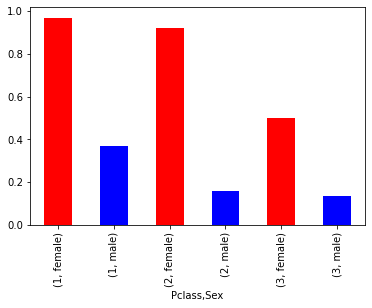

In [1]:
import pandas as pd

titanic = pd.read_csv('train.csv')
print(titanic.columns)
titanic_pclass = titanic.groupby(['Pclass','Sex'])['Survived'].mean()
titanic_pclass.plot(kind='bar',color=['red','blue'])